In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set() # 設定seaborn 樣式

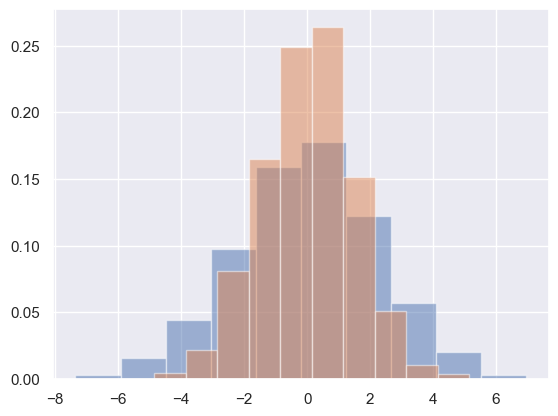

In [3]:
# matplotlib 的直方圖畫法
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy': # python中字串會分別進行迭代
    plt.hist(data[col], density=True, alpha=0.5)

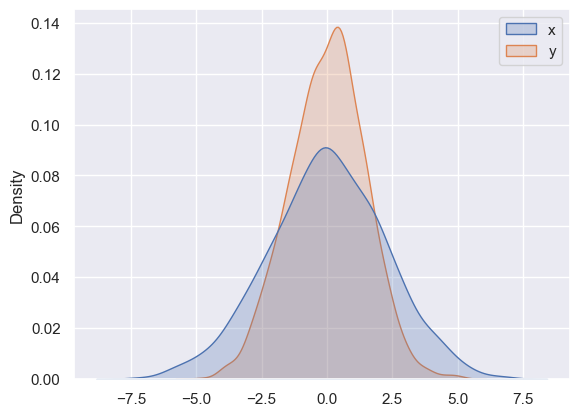

In [4]:
# Seaborn 可以用簡單的方法得到核密度估計
sns.kdeplot(data=data, fill=True);

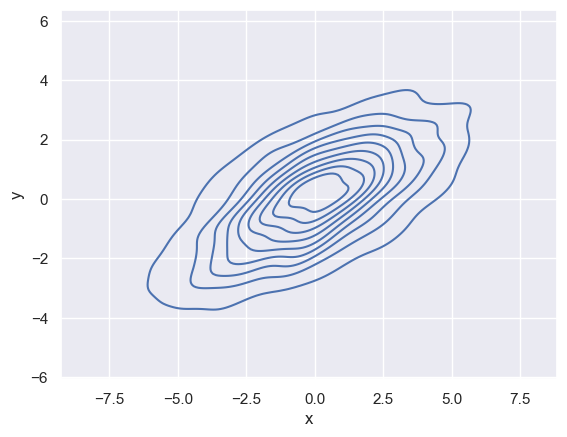

In [5]:
# 二維的KDE圖表
sns.kdeplot(data=data, x='x', y='y');

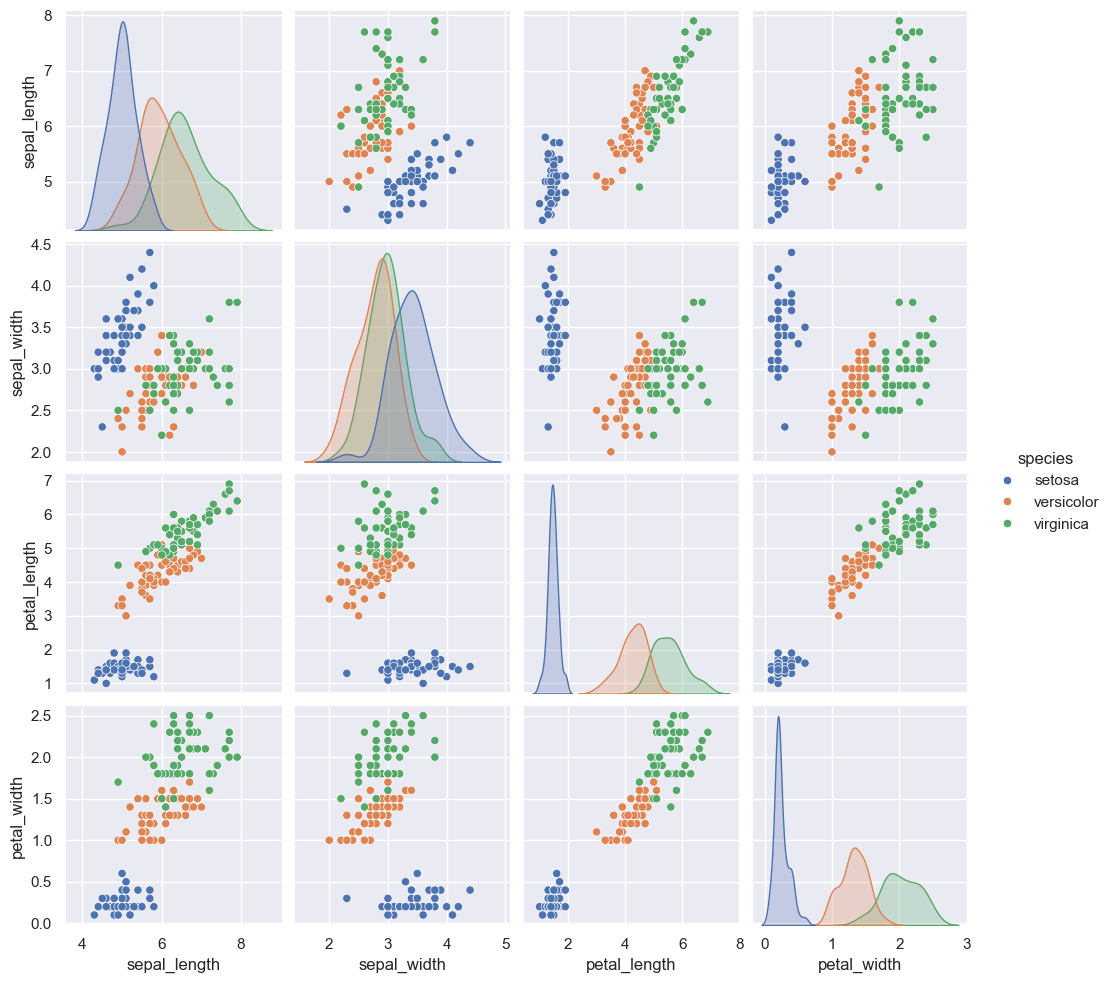

In [6]:
# 載入Iris 資料集
iris = sns.load_dataset("iris")

# 視覺化多維度關係 只需要呼叫 sns.pairplot
sns.pairplot(iris, hue="species", height=2.5);

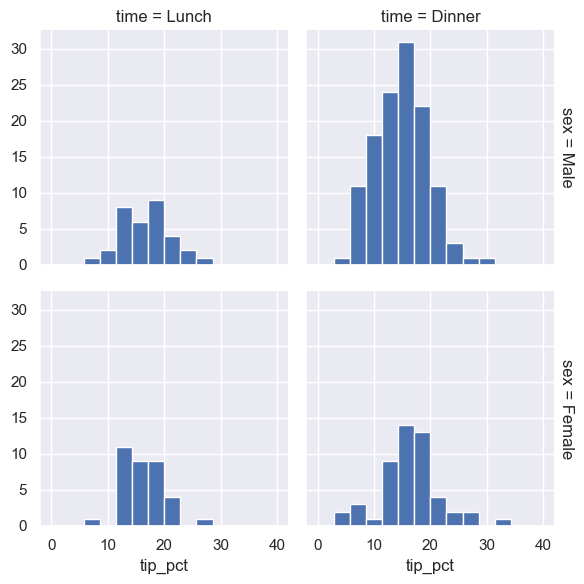

In [7]:
# 展現不同指標的直方圖 只需要使用 sns.FacetGrid
tips = sns.load_dataset('tips')

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

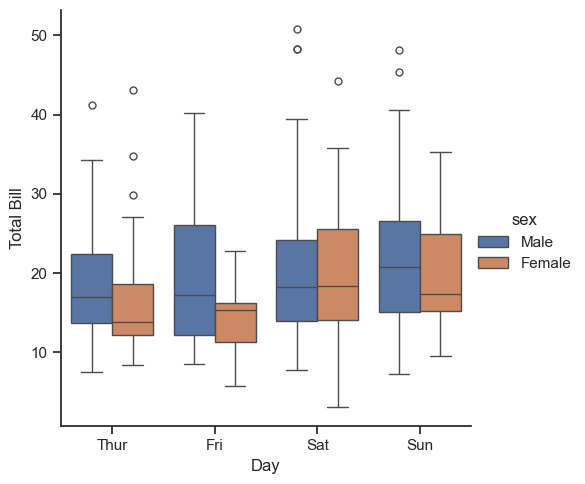

In [ ]:
# 盒鬚圖使用 sns.catplot(kind='box')
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex',
                    data=tips, kind='box')
    g.set_axis_labels("Day", "Total Bill");

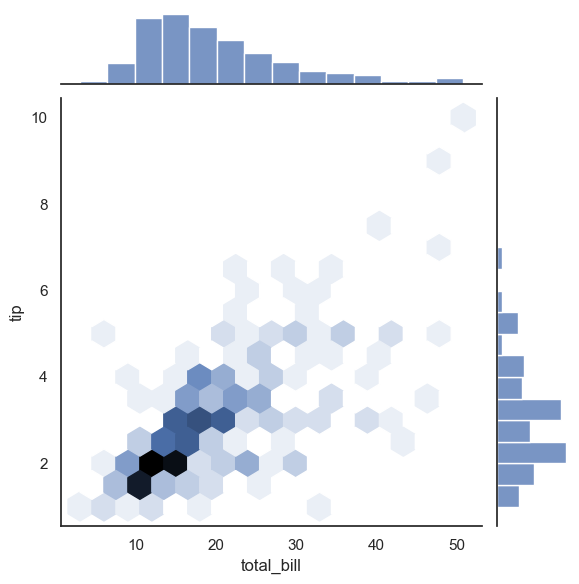

In [9]:
# 展示聯合分佈 使用 sns.jointplot
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

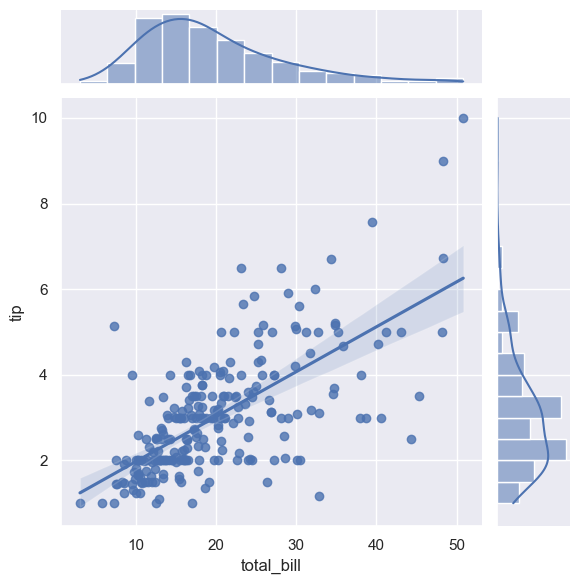

In [11]:
# 還可以執行自動核密度估計以及迴歸
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

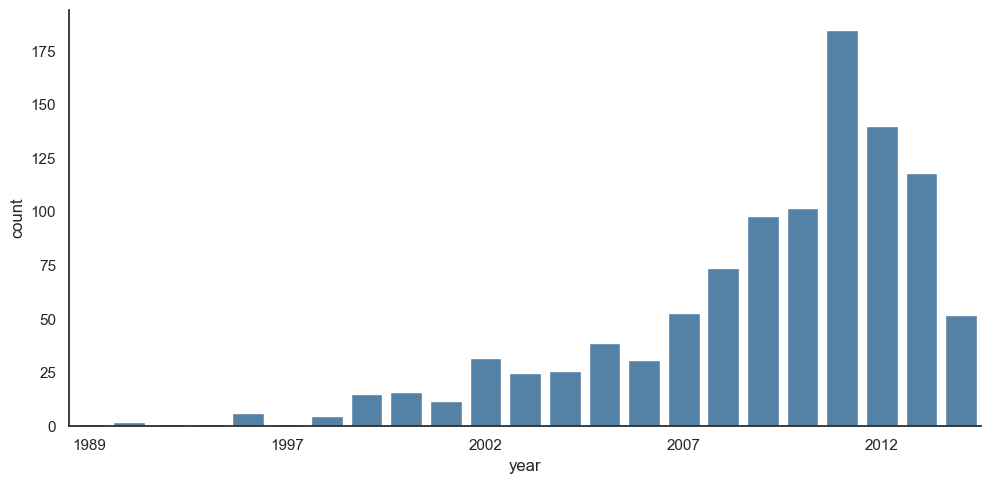

In [ ]:
planets = sns.load_dataset('planets')

# 直方圖可以當作長條圖的特例
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=2,
                    kind='count', color='steelblue')
    g.set_xticklabels(step=5)

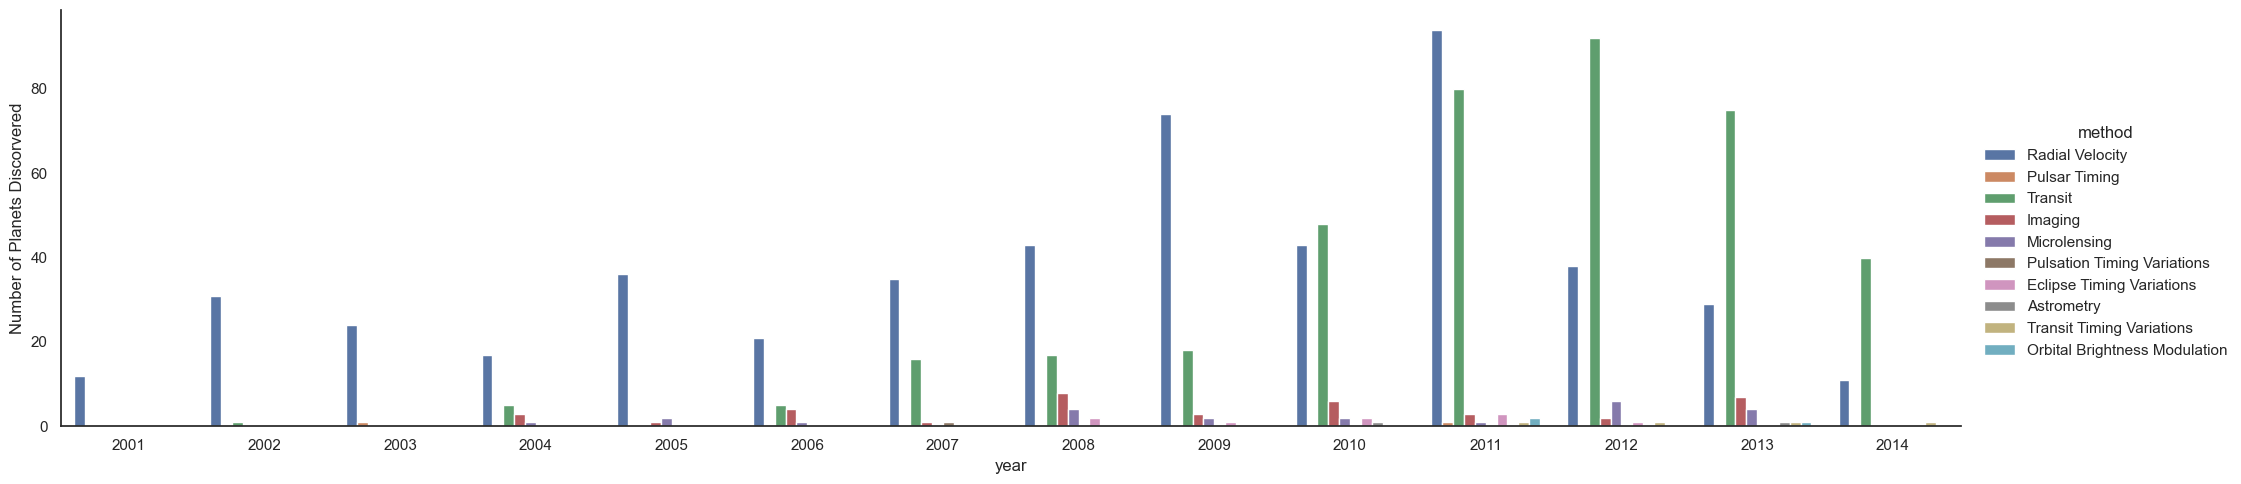

In [ ]:
# 展示時間序列可以使用 sns.factorplot
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015)) # aspect = width / height
    g.set_ylabels('Number of Planets Discorvered')

In [4]:
# 載入資料集
data = pd.read_csv('data/marathon-data.csv')
print(data.head())

   age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59


In [5]:
# pandas 會把時間欄位當成python 字串
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [8]:
# 轉換時間型態
import datetime

def convert_time(string):
    h, m, s = map(int, string.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
print(data.head())

   age gender           split           final
0   33      M 0 days 01:05:38 0 days 02:08:51
1   32      M 0 days 01:06:26 0 days 02:09:28
2   31      M 0 days 01:06:49 0 days 02:10:42
3   38      M 0 days 01:06:16 0 days 02:13:45
4   31      M 0 days 01:06:32 0 days 02:13:59


In [ ]:
# 檢查時間型態
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [10]:
# 增加以秒為單位的時間
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
print(data.head())

   age gender           split           final  split_sec  final_sec
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0


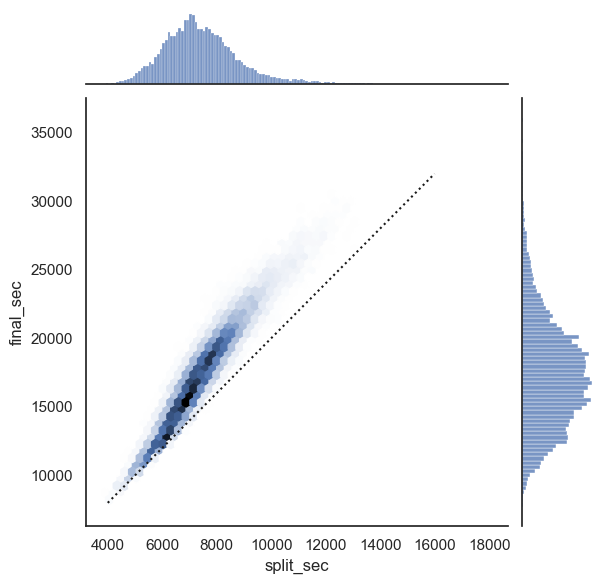

In [11]:
# 使用Seaborn 繪圖 檢視前半段與後半段馬拉松完成時間的關係圖
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data = data, kind = 'hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [12]:
# 建立新欄位 判斷是前段還是後段跑得比較快
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
print(data.head())

   age gender           split           final  split_sec  final_sec  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   

   split_frac  
0   -0.018756  
1   -0.026262  
2   -0.022443  
3    0.009097  
4    0.006842  


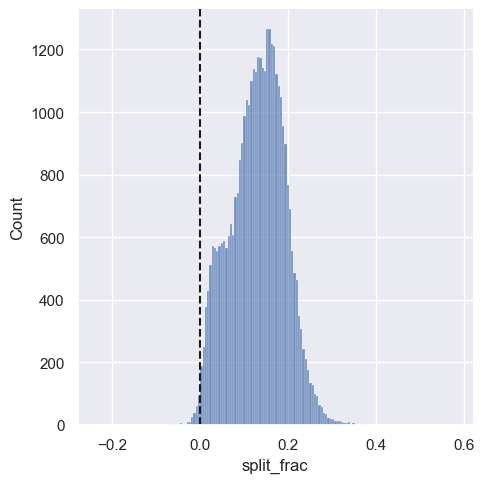

In [14]:
# 查看加速的分布圖
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--");

In [15]:
# 查看後段加速的人數
sum(data.split_frac < 0)

251

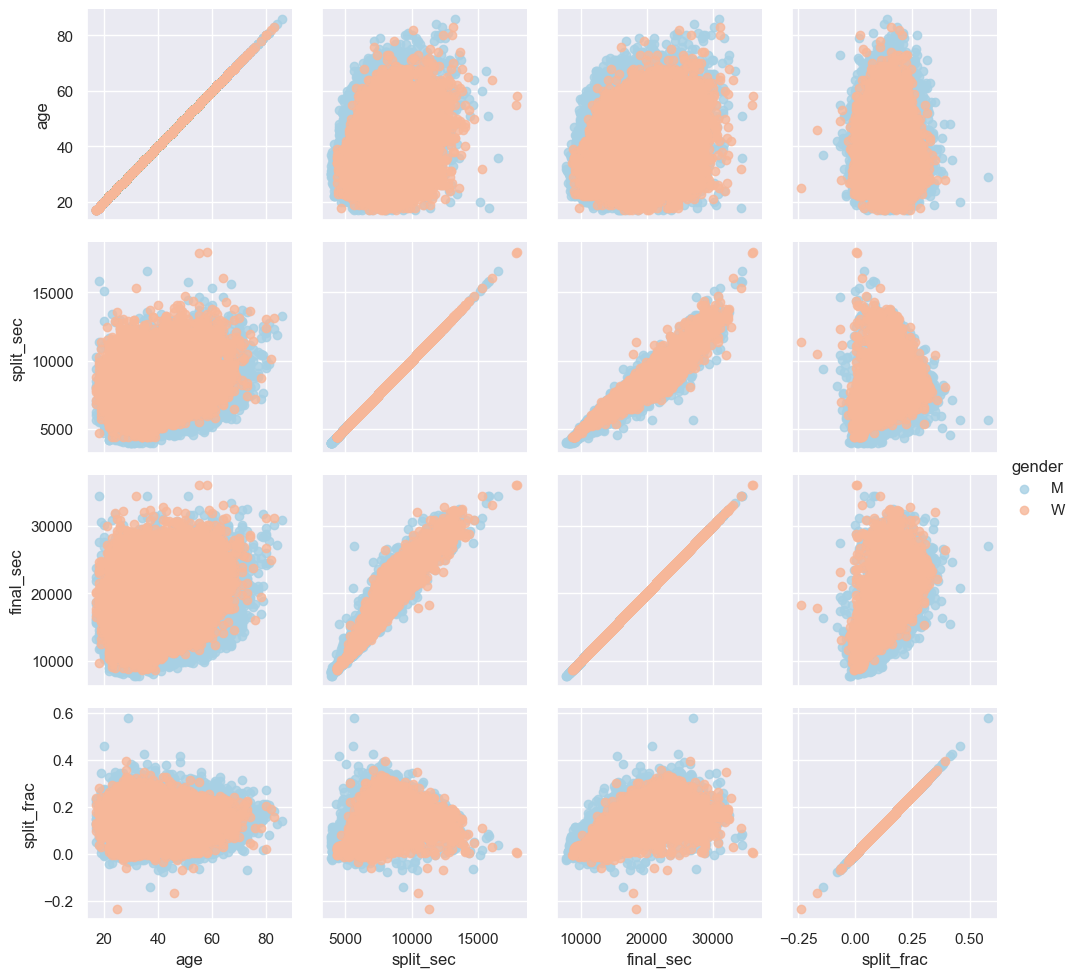

In [16]:
# 查看各變量間的關係
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

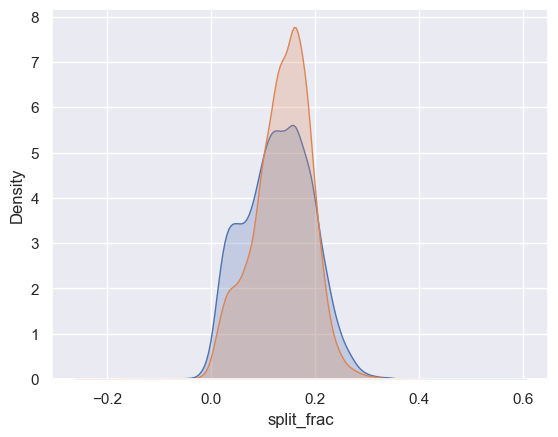

In [20]:
# 以性別來看半程分率
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

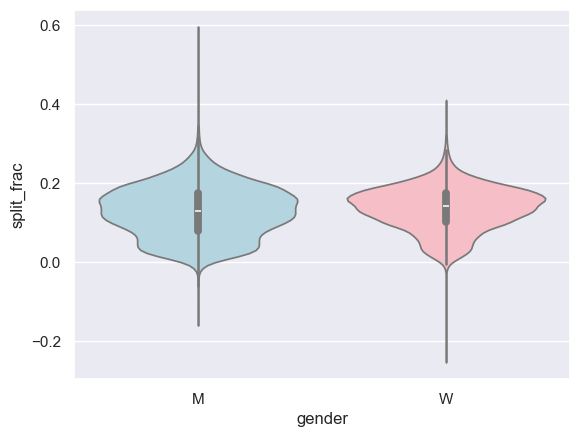

In [22]:
# 使用小提琴圖進一步比較差異
sns.violinplot(x="gender", y="split_frac", data=data, hue="gender",
               palette=['lightblue', 'lightpink']);

In [25]:
# 以10歲為一個單位 分群
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
print(data.head())

   age gender           split           final  split_sec  final_sec  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   

   split_frac  age_dec  
0   -0.018756       30  
1   -0.026262       30  
2   -0.022443       30  
3    0.009097       30  
4    0.006842       30  


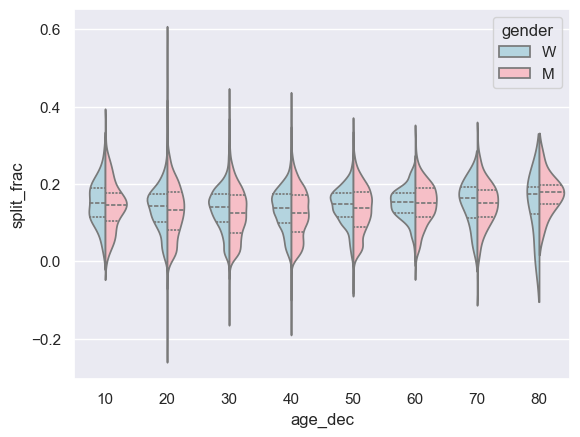

In [26]:
# 畫出新分群的小提琴圖
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [ ]:
# 80 歲的分佈有點太好了 有可能是樣本太少
print((data.age > 80).sum())

7


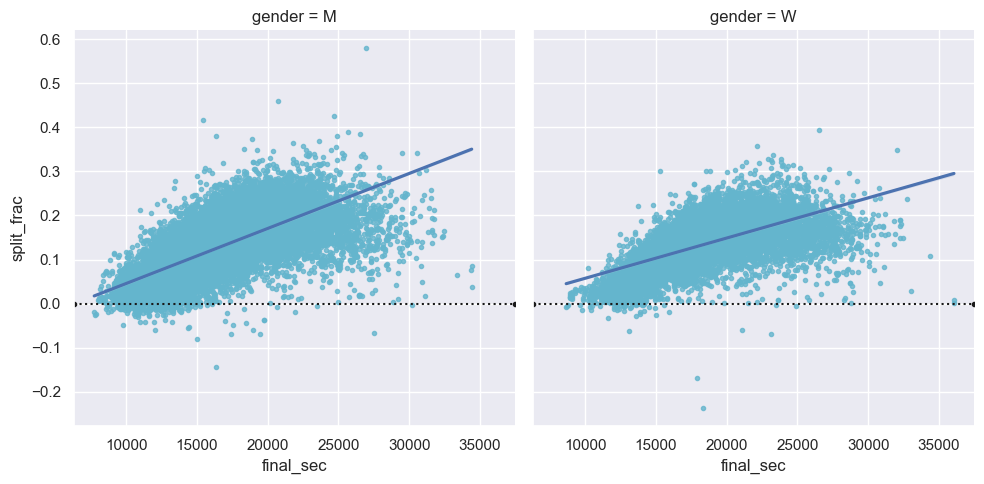

In [30]:
# 劃出迴歸線 
g = sns.lmplot(x='final_sec', y='split_frac', col = 'gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.0, color='k', ls=':');